## Install and Import Libraries

In [ ]:
!pip install git+https://github.com/oracle/Skater.git

In [1]:
import pandas as pd
import heapq
import pickle
import numpy as np
import seaborn as sns
import random
import matplotlib.patches as mpatches
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import time
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from tabulate import tabulate
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.linear_model import Perceptron
from timeit import timeit
from sklearn import datasets, tree
import datetime
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import pylab 
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
#from graphviz import Source
from IPython.display import Image
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
from scipy import interp
from sklearn.base import BaseEstimator, TransformerMixin, clone, ClassifierMixin
from sklearn import metrics, tree
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.tree import DecisionTreeClassifier
#import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import DBSCAN
#from mlxtend.classifier import StackingClassifier
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
import scipy
from sklearn.model_selection import GridSearchCV
from google.cloud import bigquery
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import chi2_contingency
import joblib

## Loading the Data

In [2]:
# set display options to show all columns
pd.set_option('display.max_columns', None)
# Set the float format to display numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format
# Set the client for future queries to BigQuery
client = bigquery.Client(project = "continente-lced-feup")
#data_table.enable_dataframe_formatter()
#auth.authenticate_user()

In [3]:
!gcloud auth application-default login

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8085%2F&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=F3s0ZcDhdgydCViyXzJEDz67VXWhbx&access_type=offline&code_challenge=bk5tlk-XHzW9yV4_vmCYkcp6M2DLaCED_W5eaHQWakM&code_challenge_method=S256


Credentials saved to file: [/Users/vp/.config/gcloud/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).

Quota project "continente-lced-feup" was added to ADC which can be used by Google client libraries for billing and quota. Note that some services may still bill the project owning the r

In [36]:
query = client.query("""
   SELECT *
   FROM 
       tables_staging.df_bold_model
    ORDER BY CUSTOMER_ACCOUNT_NR_MASK ASC, SUBCAT_CD_EXT ASC, YEAR ASC, MONTH ASC
   """)

df = query.result().to_dataframe() # Wait for the job to complete.
df

,CUSTOMER_ACCOUNT_NR_MASK,SUBCAT_CD_EXT,MONTH,YEAR,QUARTER,SEMESTER,CUST_NUM_TRANSACTIONS_MONTH,CUST_NUM_TRANSACTIONS_QUARTER,CUST_NUM_TRANSACTIONS_SEMESTER,CUST_NUM_TRANSACTIONS_YEAR,CUST_TOTAL_QTY_BOUGHT_MONTH,CUST_TOTAL_QTY_BOUGHT_QUARTER,CUST_TOTAL_QTY_BOUGHT_SEMESTER,CUST_TOTAL_QTY_BOUGHT_YEAR,CUST_NUM_UNIQUE_SUBCAT_MONTH,CUST_NUM_UNIQUE_SUBCAT_QUARTER,CUST_NUM_UNIQUE_SUBCAT_SEMESTER,CUST_NUM_UNIQUE_SUBCAT_YEAR,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,REG_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUST_AVG_BASKET_SIZE_MONTH,CUST_AVG_BASKET_SIZE_QUARTER,CUST_AVG_BASKET_SIZE_SEMESTER,CUST_AVG_BASKET_SIZE_YEAR,SUBCAT_NUM_TRANSACTIONS_MONTH,SUBCAT_NUM_TRANSACTIONS_QUARTER,SUBCAT_NUM_TRANSACTIONS_SEMESTER,SUBCAT_NUM_TRANSACTIONS_YEAR,SUBCAT_TOTAL_QTY_BOUGHT_MONTH,SUBCAT_TOTAL_QTY_BOUGHT_QUARTER,SUBCAT_TOTAL_QTY_BOUGHT_SEMESTER,SUBCAT_TOTAL_QTY_BOUGHT_YEAR,SUBCAT_NUM_UNIQUE_CUST_MONTH,SUBCAT_NUM_UNIQUE_CUST_QUARTER,SUBCAT_NUM_UNIQUE_CUST_SEMESTER,SUBCAT_NUM_UNIQUE_CUST_YEAR,CUSTSUBCAT_NUM_TRANSACTIONS_MONTH,CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER,CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER,CUSTSUBCAT_NUM_TRANSACTIONS_YEAR,CUSTSUBCAT_TOTAL_QTY_BOUGHT_MONTH,CUSTSUBCAT_TOTAL_QTY_BOUGHT_QUARTER,CUSTSUBCAT_TOTAL_QTY_BOUGHT_SEMESTER,CUSTSUBCAT_TOTAL_QTY_BOUGHT_YEAR,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER,CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR,GENDER,FAMILY_MEMBERS,SEG_LIFESTYLE_CD,SEG_LIFESTAGE_CD,CAT_CD_EXT,TARGET
0,37912,10101,1,2021,1,1,5,5,5,5,24,24,24,24,12,12,12,12,2.25,2.25,2.25,2.25,4.20,3.60,3.60,3.60,3.60,2733,2733,2733,2733,4304,4304,4304,4304,1741,1741,1741,1741,0,0,0,0,0,0,0,0,0.00,0,0,0,M,"(3, 8)",2,4,101,0
1,37912,10101,2,2021,1,1,6,11,11,11,46,70,70,70,20,27,27,27,4.20,5.30,5.30,5.30,2.40,5.50,4.64,4.64,4.64,2640,5373,5373,5373,4140,8444,8444,8444,1676,2504,2504,2504,0,0,0,0,0,0,0,0,0.00,0,0,0,M,"(3, 8)",2,4,101,1
2,37912,10101,3,2021,1,1,11,22,22,22,60,130,130,130,21,37,37,37,2.40,3.86,3.86,3.86,5.20,3.55,4.09,4.09,4.09,2924,8297,8297,8297,4686,13130,13130,13130,1863,3090,3090,3090,2,2,2,2,3,3,3,3,9.00,9,9,9,M,"(3, 8)",2,4,101,1
3,37912,10101,4,2021,2,1,6,6,28,28,29,29,159,159,13,13,39,39,5.20,5.20,4.11,4.11,6.00,4.17,4.17,4.11,4.11,2577,2577,10874,10874,4200,4200,17330,17330,1760,1760,3511,3511,2,2,4,4,4,4,7,7,12.00,12,13,13,M,"(3, 8)",2,4,101,1
4,37912,10101,5,2021,2,1,5,11,33,33,31,60,190,190,13,20,44,44,6.00,5.50,4.38,4.38,3.57,4.20,4.18,4.12,4.12,2824,5401,13698,13698,4815,9015,22145,22145,1885,2731,3890,3890,1,3,5,5,1,5,8,8,0.00,20,17,17,M,"(3, 8)",2,4,101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365383,130366108,170313,8,2022,3,2,9,21,21,55,67,142,142,463,25,43,43,67,3.00,2.70,2.70,4.28,2.67,6.11,5.19,5.19,5.84,106,191,191,618,190,318,318,912,93,158,158,443,0,1,1,2,0,1,1,2,0.00,0,0,12,M,"(3, 8)",1,4,1703,0
3365384,130366108,170313,9,2022,3,2,10,31,31,65,76,218,218,539,25,51,51,69,2.67,2.93,2.93,4.14,4.00,5.80,5.39,5.39,5.83,67,258,258,685,89,407,407,1001,63,207,207,485,0,1,1,2,0,1,1,2,0.00,0,0,12,M,"(3, 8)",1,4,1703,0
3365385,130366108,170313,10,2022,4,2,7,7,38,72,18,18,236,557,10,10,54,70,4.00,4.00,3.27,4.20,4.80,1.86,1.86,4.74,5.44,78,78,336,763,118,118,525,1119,71,71,268,533,0,0,1,2,0,0,1,2,0.00,0,0,12,M,"(3, 8)",1,4,1703,0
3365386,130366108,170313,11,2022,4,2,6,13,44,78,54,72,290,611,18,24,57,71,4.80,4.33,3.47,4.23,2.75,4.33,3.00,4.68,5.36,77,155,413,840,105,223,630,1224,65,131,316,568,0,0,1,2,0,0,1,2,0.00,0,0,12,M,"(3, 8)",1,4,1703,0


In [5]:
query_products = client.query("""
   SELECT *
   FROM 
       tables_raw.dim_product
  LIMIT 6000000
   """)

pdct_df = query_products.result().to_dataframe() # Wait for the job to complete.

In [6]:
pdct_df = pdct_df[['SUBCAT_CD_EXT', 'SUBCAT_DSC_EXT']]

## Data Preparation

In [37]:


# Specify the columns to drop null values except for
columns_to_exclude = ['TARGET', 'REG_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH']

# Drop null values except for the specified columns
df = df.dropna(subset=[col for col in df.columns if col not in columns_to_exclude])


#df = df.dropna()
df = df.drop_duplicates()



In [38]:

df['fulldate'] = pd.to_datetime(df['MONTH'].astype(str) + '-' + df['YEAR'].astype(str))
# change from dtype datetime64[ns] to date time month
df['fulldate'] = df['fulldate'].dt.to_period('M')

In [39]:
df_sample = df.groupby('fulldate').sample(frac=1, random_state=101)

#drop customer id column because we want to generalize the model, instead of trying to predict for each customer
df_sample = df_sample.drop(columns=['CUSTOMER_ACCOUNT_NR_MASK','REG_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'])

#df_500k.value_counts('fulldate').sort_index()

In [40]:
# Function to replace outliers with average value of the column
def replace_outliers_with_average(df_non_minmax, column):
    # Calculate the lower and upper bounds for outliers using the boxplot rule
    q1 = df_non_minmax[column].quantile(0.25)
    q3 = df_non_minmax[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Replace outliers with the average value of the column
    avg_value = df_non_minmax[column].mean()
    df_non_minmax[column] = df_non_minmax[column].apply(lambda x: avg_value if x < lower_bound or x > upper_bound else x)
    
    return df_non_minmax

# Detect outliers and replace them with average for each column in 'columns_to_check'
numerical_columns = ['CUST_NUM_TRANSACTIONS_MONTH', 'CUST_NUM_TRANSACTIONS_QUARTER',
       'CUST_NUM_TRANSACTIONS_SEMESTER', 'CUST_NUM_TRANSACTIONS_YEAR',
       'CUST_TOTAL_QTY_BOUGHT_MONTH', 'CUST_TOTAL_QTY_BOUGHT_QUARTER',
       'CUST_TOTAL_QTY_BOUGHT_SEMESTER', 'CUST_TOTAL_QTY_BOUGHT_YEAR',
       'CUST_NUM_UNIQUE_SUBCAT_MONTH', 'CUST_NUM_UNIQUE_SUBCAT_QUARTER',
       'CUST_NUM_UNIQUE_SUBCAT_SEMESTER', 'CUST_NUM_UNIQUE_SUBCAT_YEAR',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR',
       'CUST_AVG_BASKET_SIZE_MONTH', 'CUST_AVG_BASKET_SIZE_QUARTER',
       'CUST_AVG_BASKET_SIZE_SEMESTER', 'CUST_AVG_BASKET_SIZE_YEAR',
       'SUBCAT_NUM_TRANSACTIONS_MONTH', 'SUBCAT_NUM_TRANSACTIONS_QUARTER',
       'SUBCAT_NUM_TRANSACTIONS_SEMESTER', 'SUBCAT_NUM_TRANSACTIONS_YEAR',
       'SUBCAT_TOTAL_QTY_BOUGHT_MONTH', 'SUBCAT_TOTAL_QTY_BOUGHT_QUARTER',
       'SUBCAT_TOTAL_QTY_BOUGHT_SEMESTER', 'SUBCAT_TOTAL_QTY_BOUGHT_YEAR',
       'SUBCAT_NUM_UNIQUE_CUST_MONTH', 'SUBCAT_NUM_UNIQUE_CUST_QUARTER',
       'SUBCAT_NUM_UNIQUE_CUST_SEMESTER', 'SUBCAT_NUM_UNIQUE_CUST_YEAR',
       'CUSTSUBCAT_NUM_TRANSACTIONS_MONTH',
       'CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER',
       'CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER',
       'CUSTSUBCAT_NUM_TRANSACTIONS_YEAR', 'CUSTSUBCAT_TOTAL_QTY_BOUGHT_MONTH',
       'CUSTSUBCAT_TOTAL_QTY_BOUGHT_QUARTER',
       'CUSTSUBCAT_TOTAL_QTY_BOUGHT_SEMESTER',
       'CUSTSUBCAT_TOTAL_QTY_BOUGHT_YEAR',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR']

for column in numerical_columns:
    df_sample = replace_outliers_with_average(df_sample, column)
    
df_sample.shape

(3365388, 56)

In [41]:
scaler = MinMaxScaler()
df_sample[numerical_columns] = scaler.fit_transform(df_sample[numerical_columns])

## Feature selection: Filter methods - No need to run

In [10]:
def our_heatmap(df_values, pv, threshold=1.1):
    
    # Define the colors
    colors = ['#84161a', '#fcf2f2']

    # Create a list of relative positions for each color
    positions = [0, 1]

    # Create the custom colormap
    cmap = mcolors.LinearSegmentedColormap.from_list("", list(zip(positions, colors)))

    if pv:
        # keep only the pvalues below the threshold
        df_values = df_values[df_values < threshold]

    else:
        # keep only the correlations above the threshold
        df_values = df_values[df_values >= threshold]

    # Plot the heatmap with the custom colormap
    fig, ax = plt.subplots(figsize=(20, 15))
    sns.heatmap(df_values, annot=True, cmap=cmap, vmin=0, vmax=1)

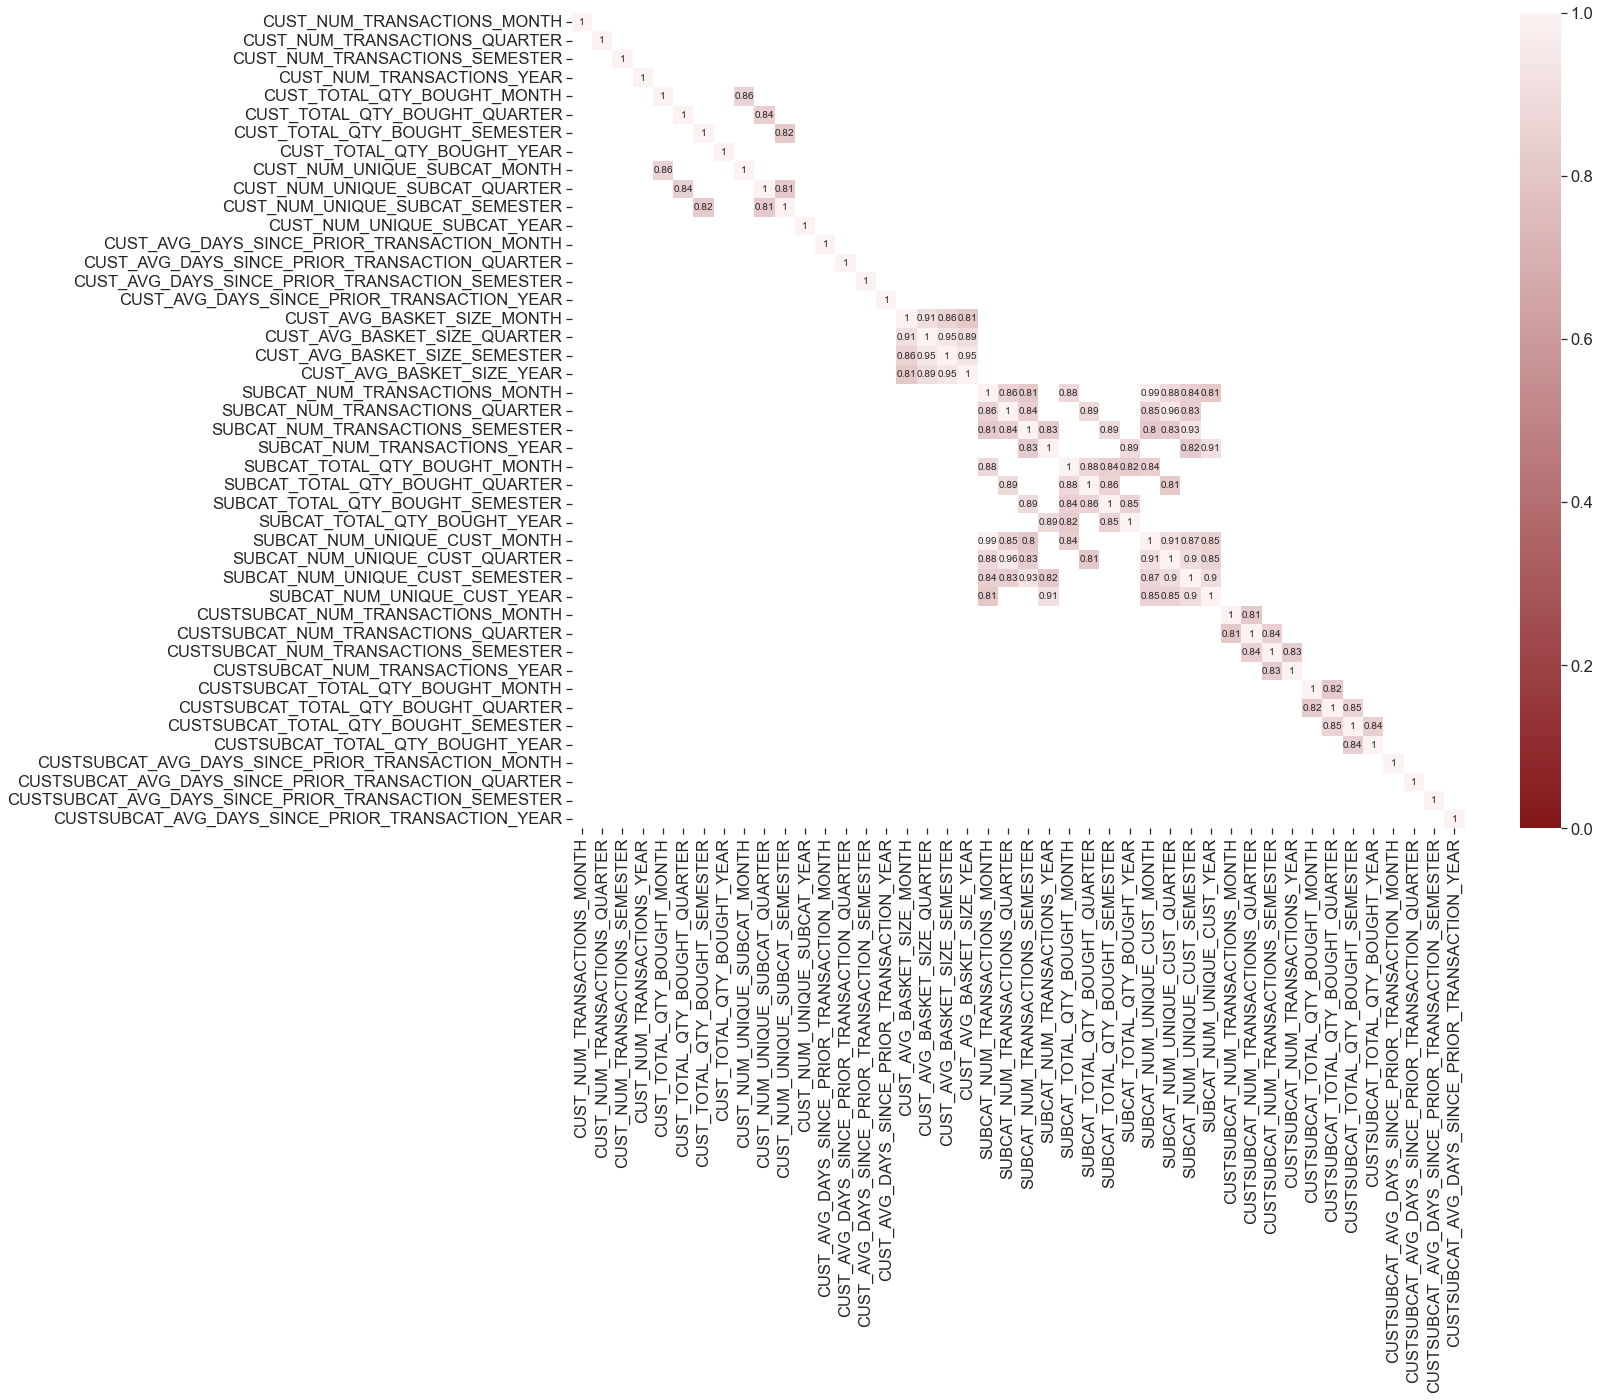

In [14]:
# calculate correlation matrix
corr = df[numerical_columns].corr()
our_heatmap(corr, False, 0.8)

In [ ]:
# Bootstrap sampling to identify associations/correlations between categorical variables

categorical_columns = ['SUBCAT_CD_EXT','MONTH','QUARTER','SEMESTER','YEAR','GENDER','SEG_LIFESTYLE_CD','SEG_LIFESTAGE_CD','CAT_CD_EXT', 'FAMILY_MEMBERS']

df_200k = df[categorical_columns]

# Create an empty matrix to store the p-values
pvals = np.zeros((len(df_200k.columns), len(df_200k.columns)))

n_bootstraps = 1000

pvals_ind = [None]*1000

# Loop through all pairs of variables and calculate the p-value
for i, var1 in enumerate(df_200k.columns):
    for j, var2 in enumerate(df_200k.columns):
        if i == j:
            continue
        else:
            for k in range(0, n_bootstraps):
                sample = df_200k.sample(200, replace=True)
                cont_table = pd.crosstab(sample[var1], sample[var2])
                chi2, pval, dof, expected = chi2_contingency(cont_table)
                pvals_ind[k] = pval
        
            pvals[i, j] = np.mean(pvals_ind)

# Convert the matrix to a data frame and print the results
pvals_df = pd.DataFrame(pvals, columns=df_200k.columns, index=df_200k.columns)

pvals_df

In [ ]:
our_heatmap(pvals_df)
our_heatmap(pvals_df, 0.05)

## One-hot Encoding

In [42]:
df_sample = df_sample.drop(columns=['QUARTER','SEMESTER','SEG_LIFESTAGE_CD','SEG_LIFESTYLE_CD','MONTH', 'SUBCAT_CD_EXT'])

In [43]:
# One-hot encoding categorical variables
df_sample = pd.get_dummies(df_sample, columns=['GENDER','FAMILY_MEMBERS','CAT_CD_EXT','YEAR'])

## Outlier detection (unsupervised learning) - No need to run

In [ ]:
def plot_3d_clusters(df_clst, z_rot):
    # Compute the first three principal components of the data
    pca = PCA(n_components=3)
    principal_components = pca.fit_transform(df_clst)

    # Create a scatter plot of the first three principal components, colored by cluster
    cluster_colors = np.array(['#de1c26', 'yellow', 'orange', 'red', 'purple', 'black', 'gray', 'magenta', '#84161a'])
    sns.set_style("ticks", {"axes.facecolor": "#ffffff"})
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(principal_components[:,0], principal_components[:,1], principal_components[:,2], c=cluster_colors[df_clst['cluster'].values % len(cluster_colors)], alpha=0.8)
    ax.scatter(principal_components[outliers_mask, 0], principal_components[outliers_mask, 1], principal_components[outliers_mask, 2], c='#84161a', marker='X', s=100, alpha=1.0)
    ax.view_init(elev=10, azim=z_rot)
    
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')

    ax.w_xaxis.set_pane_color('#fcf2f2')  # Change x-axis color
    ax.w_yaxis.set_pane_color('#fcf2f2')  # Change y-axis color
    ax.w_zaxis.set_pane_color('#fcf2f2')  # Change z-axis color

    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    #ax.grid(False)

    plt.show()


def plot_2d_clusters(df_clst):
    # Compute the first two principal components of the data
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df_clst)

    # Create a scatter plot of the first three principal components, colored by cluster
    cluster_colors = np.array(['#de1c26', 'yellow', 'orange', 'red', 'purple', 'black', 'gray', 'magenta', '#84161a'])
    sns.set_style("ticks", {"axes.facecolor": "#ffffff"})
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    ax.scatter(principal_components[:,0], principal_components[:,1], c=cluster_colors[df_clst['cluster'].values % len(cluster_colors)], alpha=0.8)
    ax.scatter(principal_components[outliers_mask, 0], principal_components[outliers_mask, 1], c='#84161a', marker='X', s=100, alpha=1.0)

    ax.set_facecolor('#fcf2f2')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.show()

In [ ]:
# Extract the numerical columns
df_200k_out = df_200k[numerical_columns]

batch_size = 50000

while len(df_200k_out) > batch_size:
    df_50k = df_200k_out.sample(batch_size, replace=False)
    # Perform DBSCAN clustering and obtain cluster labels
    dbscan = DBSCAN(eps=0.6, min_samples=800)
    labels = dbscan.fit_predict(df_50k)

    # Identify the outliers
    outliers_mask = labels == -1
    outliers = df_50k[outliers_mask]
    df_200k_out = df_200k_out.drop(index=df_50k.index)
    df_200k = df_200k.drop(index=outliers.index)

    print("Number of outliers:", len(outliers))

    # Add cluster labels to the original dataframe
    df_50k['cluster'] = labels


# Perform DBSCAN clustering and obtain cluster labels
dbscan = DBSCAN(eps=0.6, min_samples=800)
labels = dbscan.fit_predict(df_200k_out)

# Identify the outliers
outliers_mask = labels == -1
outliers = df_200k_out[outliers_mask]
df_200k = df_200k.drop(index=outliers.index)

print("Number of outliers:", len(outliers))

# Add cluster labels to the original dataframe
df_200k_out['cluster'] = labels

plot_2d_clusters(df_200k_out)

plot_3d_clusters(df_200k_out, 0)
plot_3d_clusters(df_200k_out, 90)
plot_3d_clusters(df_200k_out, 180)
plot_3d_clusters(df_200k_out, 270)

## Machine Learning

In [44]:
def get_results(model, gs ,name, data, true_labels, target_names = ['No buy', 'Buy'], results=None, reasume=False):
    global param
    
    if hasattr(model, 'layers'):
        param = wtp_dnn_model.history.params
        best = np.mean(history.history['val_accuracy'])
        # predicted_labels_test = np.argmax(model.predict(data) , axis=-1)
        # print(f'This is Predicted_Labels_test in the first if :{predicted_labels_test}')
        predicted_labels = (model.predict_proba(data)[:,1] >= 0.5).astype(int)
        print(f'\n\nThis is Predicted_Labels in the first if:{predicted_labels}\n\n')
        im_model = InMemoryModel(model.predict, examples=data, target_names=target_names)

    else:
        
        param = gs.best_params_
        best = gs.best_score_
        # predicted_labels_test = model.predict(data).ravel()
        # print(f'This is Predicted_Labels_test - else:{predicted_labels_test}')
        predicted_labels = (model.predict_proba(data)[:,1] >= 0.5).astype(int)
        print(f'\n\nThis is Predicted_Labels - else :{predicted_labels}\n\n')

        if hasattr(model, 'predict_proba'):
            #predicted_probs = model.predict_proba(data)[:, 1]
            #print(f'This is the predict_proba results but the ones from the get_results function: {predicted_probs}')
            print('This model has a predict_proba method')
        elif hasattr(model, 'decision_function'):
            im_model = InMemoryModel(model.decision_function, examples=data, target_names=target_names)
        else: 
            print('Cannot use InMemoryModel as predict_proba is not available')
           
        
    print('Mean Best Accuracy: {:2.2%}'.format(best))
    print('-'*60)
    print('Best Parameters:')
    print(param)
    print('-'*60)
    
    #y_pred = model.predict(data).ravel()

    #y_predict_class = [1 if prob > 0.4 else 0 for prob in y_predict_prob_class_1]

    # y_pred = (model.predict_proba(data)[:,1] >= 0.7).astype(bool)

    y_pred = (model.predict_proba(data)[:,1] >= 0.5).astype(int).ravel()
    #y_pred = int(y_pred)

    display_model_performance_metrics(true_labels, predicted_labels = predicted_labels, target_names = target_names)
    if len(target_names)==2:
        ras = roc_auc_score(y_true=true_labels, y_score=y_pred)
    else:
        roc_auc_multiclass, ras = roc_auc_score_multiclass(y_true=true_labels, y_score=y_pred, target_names=target_names)
        print('\nROC AUC Score by Classes:\n',roc_auc_multiclass)
        print('-'*60)

    print('\n\n              ROC AUC Score: {:2.2%}'.format(ras))
    prob, score_roc, roc_auc = plot_model_roc_curve(model, data, true_labels, label_encoder=None, class_names=target_names)
    
    #interpreter = Interpretation(data, feature_names=cols)
    #plots = interpreter.feature_importance.plot_feature_importance(im_model, progressbar=False, n_jobs=1, ascending=True)
    
    r1 = pd.DataFrame([(prob, best, np.round(accuracy_score(true_labels, predicted_labels), 4), 
                         ras, roc_auc)], index = [name],
                         columns = ['Prob', 'CV Accuracy', 'Accuracy', 'ROC AUC Score', 'ROC Area'])
    if reasume:
        results = r1
    elif (name in results.index):        
        results.loc[[name], :] = r1
    else: 
        results = results.append(r1)
        
    return y_pred, results 


def roc_auc_score_multiclass(y_true, y_score, target_names, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(y_true)
  roc_auc_dict = {}
  mean_roc_auc = 0
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_y_true = [0 if x in other_class else 1 for x in y_true]
    new_y_score = [0 if x in other_class else 1 for x in y_score]
    num_new_y_true = sum(new_y_true)

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_y_true, new_y_score, average = average)
    roc_auc_dict[target_names[per_class]] = np.round(roc_auc, 4)
    mean_roc_auc += num_new_y_true * np.round(roc_auc, 4)
    
  mean_roc_auc = mean_roc_auc/len(y_true)  
  return roc_auc_dict, mean_roc_auc

def get_metrics(true_labels, predicted_labels):
    global accuracy
    global precision
    global recall
    global f1
    accuracy = metrics.accuracy_score(true_labels, predicted_labels)
    precision = metrics.precision_score(true_labels, predicted_labels, zero_division=1.0)
    recall = metrics.recall_score(true_labels, predicted_labels)
    f1 = metrics.f1_score(true_labels, predicted_labels)
    
    print('Accuracy:  {:2.2%} '.format(accuracy))
    print('Precision: {:2.2%} '.format(precision))
    print('Recall:    {:2.2%} '.format(recall))
    print('F1 Score:  {:2.2%} '.format(f1))
    # #append results to arrays
    # np.append(accuracy_array, metrics.accuracy_score(true_labels, predicted_labels))
    # np.append(precision_array, metrics.precision_score(true_labels, predicted_labels, average='weighted'))
    # np.append(recall_array, metrics.recall_score(true_labels, predicted_labels, average='weighted'))
    # np.append(f1_array, metrics.f1_score(true_labels, predicted_labels, average='weighted'))
    
                        

def train_predict_model(classifier,  train_features, train_labels,  test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, target_names):
    
    total_classes = len(target_names)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], target_names], codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], target_names], codes=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, target_names):

    report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=target_names) 
    print(report)
    
def display_model_performance_metrics(true_labels, predicted_labels, target_names):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)

def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
   
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prb = clf.predict_proba(features)
            if prb.shape[1] > 1:
                y_score = prb[:, prb.shape[1]-1] 
            else:
                y_score = clf.predict(features).ravel()
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            print("\n")
            #raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(true_labels, y_score)      
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve (area = {0:3.2%})'.format(roc_auc), linewidth=2.5)
        
    elif n_classes > 2:
        if  hasattr(clf, 'clfs_'):
            y_labels = label_binarize(true_labels, classes=list(range(len(class_labels))))
        else:
            y_labels = label_binarize(true_labels, classes=class_labels)
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
            
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_labels[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_labels.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(12, 6))
        plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["macro"]), linewidth=3)
  
        for i, label in enumerate(class_names):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:2.2%})'
                                           ''.format(label, roc_auc[i]), linewidth=2, linestyle=':')
            
        roc_auc = roc_auc["macro"]   
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    
    return prob, y_score, roc_auc

In [45]:
class select_fetaures(object):  # BaseEstimator, TransformerMixin,
     def __init__(self, select_cols):
         self.select_cols_ = select_cols

     def fit(self, X, Y):
         pass

     def transform(self, X):
         return X.loc[:, self.select_cols_]

     def fit_transform(self, X, Y):
         self.fit(X, Y)
         df = self.transform(X)
         return df

     def __getitem__(self, x):
         return self.X[x], self.Y[x]

In [46]:
def LR(X_train, y_train, X_train_tune, y_train_tune, X_test, y_test):
        
    clf = Pipeline([
                # ('pca', PCA()),
                ('clf', LogisticRegression())])  

    param_grid = {}

    # Use SequentialFeatureSelector for forward/backward selection
    sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', tol=0.00, direction='forward', scoring='precision', cv=None, n_jobs=-1)  # Does 5-Fold CV

    # Fit the feature selector to the training data
    sfs_backward.fit(X_train_tune, y_train_tune)

    # Get the selected features and transform the data
    X_train = sfs_backward.transform(X_train)
    X_test = sfs_backward.transform(X_test)

    global features_selected
    features_selected = sfs_backward.feature_names_in_[sfs_backward.support_]

    print('Number of selected features: {}'.format(sfs_backward.n_features_to_select_))
    print('Features selected: {}'.format(sfs_backward.feature_names_in_[sfs_backward.support_]))
        
    gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='precision', cv=2, verbose=1, n_jobs=-1)
    LR = Pipeline([('gs', gs)]) 
        
    LR.fit(X_train,y_train)
    
    #print the number of features used in the model
    #print('Number of features used: {}'.format(LR.named_steps['gs'].best_estimator_.named_steps['clf'].coef_.shape[1]))

    #joblib.dump(LR, 'LR.joblib')


    global y_proba
    y_proba = LR.predict_proba(X_test)

    

    y_pred, results = get_results(LR, gs ,'Logistic Regression', X_test, y_test, reasume=True)
    print(results)
    print(f'This is the predict_proba results {y_proba}')

    return y_pred
        

def RF(X_train, y_train, X_train_tune, y_train_tune, X_test, y_test):

    clf = Pipeline([
                # ('pca', PCA()),
                ('clf', RandomForestClassifier())])  

    param_grid = {'clf__criterion': ['gini']  # , 'entropy', 'log_loss'
                  ,'clf__n_estimators':  [500]       
                  ,'clf__min_samples_split': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
                  ,'clf__max_depth': [10, 50, 100, 150, 200]
                  ,'clf__min_samples_leaf': [20, 40, 60, 80, 100]}
    
    # Use SequentialFeatureSelector for forward/backward selection
    sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', tol=0.00, direction='forward', scoring='recall', cv=None, n_jobs=-1)  # Does 5-Fold CV

    # Fit the feature selector to the training data
    sfs_backward.fit(X_train_tune, y_train_tune)

    global features_selected
    features_selected = sfs_backward.feature_names_in_[sfs_backward.support_]

    # Get the selected features and transform the data
    X_train = sfs_backward.transform(X_train)
    X_test = sfs_backward.transform(X_test)

    print('Number of selected features: {}'.format(sfs_backward.n_features_to_select_))
    print('Features selected: {}'.format(sfs_backward.feature_names_in_[sfs_backward.support_]))

    gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='recall', cv=2, verbose=1, n_jobs=-1)
    RF = Pipeline([('gs', gs)]) 
        
    RF.fit(X_train,y_train)

    #joblib.dump(RF, 'RF.joblib')


    global y_proba
    y_proba = RF.predict_proba(X_test)

    y_pred, results = get_results(RF, gs ,'Random Forest', X_test, y_test, reasume=True)
    print(results)
    print(f'This is the predict_proba results {y_proba}')

    return y_pred


def SVM(X_train, y_train, X_train_tuning, y_train_tuning, X_test, y_test):

    clf = Pipeline([
                # ('pca', PCA()),
                ('clf', svm.SVC())])  

    param_grid = {'clf__C': [0.05, 0.1, 0.15, 0.2]  # 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0
                  ,'clf__kernel' : ['rbf']}   #, 'linear', , 'poly', 'linear', 'sigmoid', 'precomputed'

    # Use SequentialFeatureSelector for backward selection
    sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', tol=0.05, direction='forward', scoring='f1', cv=None, n_jobs=-1)  # Does 5-Fold CV

    # Fit the feature selector to the training data
    sfs_backward.fit(X_train_tuning, y_train_tuning)

    # Get the selected features and transform the data
    X_train = sfs_backward.transform(X_train)
    X_test = sfs_backward.transform(X_test)

    print('Number of selected features: {}'.format(sfs_backward.n_features_to_select_))
    print('Features selected: {}'.format(sfs_backward.feature_names_in_[sfs_backward.support_]))
        
    gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
    SVM = Pipeline([('gs', gs)]) 
        
    SVM.fit(X_train,y_train)

    results = get_results(SVM, gs ,'Support Vector Machines', X_test, y_test, reasume=True)
    print(results)
    

def ANN(X_train, y_train, X_train_tune, y_train_tune, X_test, y_test):
    
    clf = Pipeline([
            # ('pca', PCA()),
            ('clf', MLPClassifier())])  

    param_grid = {'clf__hidden_layer_sizes': [(64,), (128,), (256,)],
                  'clf__activation': ['relu'],
                  'clf__solver': ['adam'],
                  'clf__early_stopping': [True],  # creates a stratified validation set (10% of training data)
                  'clf__validation_fraction': [0.2], 
                  'clf__n_iter_no_change': [10],
                  'clf__alpha': [0.0001, 0.001],
                  'clf__learning_rate': ['constant','invscaling','adaptive'],
                  'clf__tol': [0.0001, 0.001],
                  'clf__learning_rate_init': [0.0001, 0.001],
                  'clf__max_iter': [1000]}

    # Use SequentialFeatureSelector for forward/backward selection
    sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', tol=0.00, direction='forward', scoring='f1', cv=None, n_jobs=-1)  # Does 5-Fold CV

    # Fit the feature selector to the training data
    sfs_backward.fit(X_train_tune, y_train_tune)

    # Get the selected features and transform the data
    X_train = sfs_backward.transform(X_train)
    X_test = sfs_backward.transform(X_test)

    print('Number of selected features: {}'.format(sfs_backward.n_features_to_select_))
    print('Features selected: {}'.format(sfs_backward.feature_names_in_[sfs_backward.support_]))

    gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=2, verbose=1, n_jobs=-1)
    ANN = Pipeline([('gs', gs)]) 
        
    ANN.fit(X_train,y_train)

    results = get_results(ANN, gs ,'Neural Network', X_test, y_test, reasume=True)
    print(results)

In [77]:
df_feature_importance = pd.DataFrame()

In [78]:
def LR(X_train, y_train, X_train_tune, y_train_tune, X_test, y_test):
    global df_feature_importance
    clf = Pipeline([
                # ('pca', PCA()),
                ('clf', LogisticRegression())])  

    param_grid = {}

    # Use SequentialFeatureSelector for forward/backward selection
    sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', tol=0.00, direction='forward', scoring='precision', cv=None, n_jobs=-1)  # Does 5-Fold CV

    # Fit the feature selector to the training data
    sfs_backward.fit(X_train_tune, y_train_tune)

    # Get the selected features and transform the data
    X_train = sfs_backward.transform(X_train)
    X_test = sfs_backward.transform(X_test)

    global features_selected
    features_selected = sfs_backward.feature_names_in_[sfs_backward.support_]

    print('Number of selected features: {}'.format(sfs_backward.n_features_to_select_))
    print('Features selected: {}'.format(sfs_backward.feature_names_in_[sfs_backward.support_]))
        
    gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='precision', cv=2, verbose=1, n_jobs=-1)
    LR = Pipeline([('gs', gs)]) 
        
    LR.fit(X_train,y_train)
    
    #print the number of features used in the model
    #print('Number of features used: {}'.format(LR.named_steps['gs'].best_estimator_.named_steps['clf'].coef_.shape[1]))

    #joblib.dump(LR, 'LR.joblib')


    global y_proba
    y_proba = LR.predict_proba(X_test)
    # Get the feature importances
    feature_importance = LR.named_steps['gs'].best_estimator_.named_steps['clf'].coef_[0]

    # Create a dictionary with feature names and their corresponding importances
    feature_importance_dict = dict(zip(features_selected, feature_importance))

    # Sort the dictionary by importance (optional)
    feature_importance_dict = dict(sorted(feature_importance_dict.items(), key=lambda item: abs(item[1]), reverse=True))

    # Create a dataframe from the dictionary
    #df_feature_importance = pd.DataFrame.from_dict(feature_importance_dict, orient='index', columns=['Importance'])
    for feature, importance in feature_importance_dict.items():
        df_feature_importance = df_feature_importance.append({'Feature': feature, 'Importance': importance}, ignore_index=True)
    # Print the feature importances
    print('')
    print('-'*60)
    print('\n\nFeature Importances:')
    for feature, importance in feature_importance_dict.items():
        print(f'{feature}: {importance}')

    # coefficients = LR.coef_[0]

    # feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})

    y_pred, results = get_results(LR, gs ,'Logistic Regression', X_test, y_test, reasume=True)
    print(results)
    print(f'This is the predict_proba results {y_proba}')

    return y_pred, df_feature_importance

In [139]:
def RF(X_train, y_train, X_train_tune, y_train_tune, X_test, y_test):
    global df_feature_importance
    clf = Pipeline([
                # ('pca', PCA()),
                ('clf', RandomForestClassifier())])  

    param_grid = {'clf__criterion': ['gini']  # , 'entropy', 'log_loss'
                  ,'clf__n_estimators':  [500]       
                  ,'clf__min_samples_split': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
                  ,'clf__max_depth': [10, 50, 100, 150, 200]
                  ,'clf__min_samples_leaf': [20, 40, 60, 80, 100]}
    
    # Use SequentialFeatureSelector for forward/backward selection
    sfs_backward = SequentialFeatureSelector(clf, n_features_to_select='auto', tol=0.00, direction='forward', scoring='recall', cv=None, n_jobs=-1)  # Does 5-Fold CV

    # Fit the feature selector to the training data
    sfs_backward.fit(X_train_tune, y_train_tune)

    global features_selected
    features_selected = sfs_backward.feature_names_in_[sfs_backward.support_]

    # Get the selected features and transform the data
    X_train = sfs_backward.transform(X_train)
    X_test = sfs_backward.transform(X_test)

    print('Number of selected features: {}'.format(sfs_backward.n_features_to_select_))
    print('Features selected: {}'.format(sfs_backward.feature_names_in_[sfs_backward.support_]))

    gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='recall', cv=2, verbose=1, n_jobs=-1)
    RF = Pipeline([('gs', gs)]) 
        
    RF.fit(X_train,y_train)
    # Compute feature importances
    feature_importance = RF.named_steps['gs'].best_estimator_.named_steps['clf'].feature_importances_
    # Create a dictionary with feature names and their corresponding importances
    feature_importance_dict = dict(zip(features_selected, feature_importance))

    # Sort the dictionary by importance (optional)
    feature_importance_dict = dict(sorted(feature_importance_dict.items(), key=lambda item: abs(item[1]), reverse=True))

    # Create a dataframe from the dictionary
    #df_feature_importance = pd.DataFrame.from_dict(feature_importance_dict, orient='index', columns=['Importance'])
    for feature, importance in feature_importance_dict.items():
        df_feature_importance = df_feature_importance.append({'Feature': feature, 'Importance': importance}, ignore_index=True)
    
    estimator = RF.named_steps['gs'].best_estimator_.named_steps['clf']
    tree_estimator = estimator.estimators_[0]  # Accessing the first decision tree
    # Modify dot_data string to customize fill colors
    dot_data = tree.export_graphviz(tree_estimator, out_file=None, feature_names=features_selected, filled=True, rounded = True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('#fcf2f2','#de1c26')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    graph.write_png('tree.png')
    
    joblib.dump(RF, 'RF.joblib')


    global y_proba
    y_proba = RF.predict_proba(X_test)

    y_pred, results = get_results(RF, gs ,'Random Forest', X_test, y_test, reasume=True)
    print(results)
    print(f'This is the predict_proba results {y_proba}')

    return y_pred, df_feature_importance

In [48]:
def random_oversampling(x_train,y_train):
    ros = RandomOverSampler(random_state=101)
    X_train, y_train = ros.fit_resample(x_train, y_train)
    
    return X_train, y_train

def roSMOTE(x_train,y_train):
    os = SMOTE(random_state=101)
    X_train, y_train = os.fit_resample(x_train, y_train)
    
    return X_train, y_train

def random_undersampling(x_train,y_train):
    rus = RandomUnderSampler(random_state=101)
    X_train, y_train = rus.fit_resample(x_train, y_train)
    
    return X_train, y_train

In [62]:
def cv_12months(df_ML, model, resampling_tecnique):
    timestamps = df_ML['fulldate'].sort_values().unique()
    #display(timestamps.size)

    # find the minimum timestamp
    min_timestamp = timestamps[0]

    #store each of the metrics in an array for each one
    accuracy_array = np.array([])
    precision_array = np.array([])
    recall_array = np.array([])
    f1_array = np.array([])

    
    probability_array = np.array([])

    # full_xtest_df = []

    df_total = pd.DataFrame()


    full_test_count = 0
    
    
    # iterate over the timestamps and check if the time difference is less than 12 months
    for ts in timestamps[:-3]:
        
        if ts + 3 < timestamps.max():
            print(f'\n\nStart Iteration {ts}\n\n')
            if (ts - min_timestamp).n < 2: # 11
               
                print(f'Treino feito com os meses: {ts} até {ts+2}') # 11   
                train = df_ML[df_ML['fulldate'].isin([ts, ts+1, ts+2])]  # ts+3, ts+4, ts+5, ts+6, ts+7, ts+8, ts+9, ts+10, ts+11
                train_tune = train.groupby('fulldate').sample(frac=0.3, random_state=101)
                X_train_cv = train.drop(['TARGET','fulldate'], axis=1)
                y_train_cv = train['TARGET'].astype(int)
                X_train_tune = train_tune.drop(['TARGET','fulldate'], axis=1)
                y_train_tune = train_tune['TARGET'].astype(int)                
                X_train_cv, y_train_cv = resampling_tecnique(X_train_cv, y_train_cv)
                X_train_tune, y_train_tune = random_undersampling(X_train_tune, y_train_tune)

                print('X_train_cv shape: ', X_train_cv.shape)
                print('X_train_tune shape: ', X_train_tune.shape)
            else:
               
                print(f'Treino feito com os meses: {ts} até {ts+2}') # 11
            
                train = df_ML[df_ML['fulldate'].isin([ts, ts+1, ts+2])]  # ts+3, ts+4, ts+5, ts+6, ts+7, ts+8, ts+9, ts+10, ts+11
                train_tune = train.groupby('fulldate').sample(frac=0.3, random_state=101)
                X_train_cv = train.drop(['TARGET','fulldate'], axis=1)
                y_train_cv = train['TARGET'].astype(int)
                X_train_tune = train_tune.drop(['TARGET','fulldate'], axis=1)
                y_train_tune = train_tune['TARGET'].astype(int) 
                X_train_cv, y_train_cv = resampling_tecnique(X_train_cv, y_train_cv)
                
                X_train_tune, y_train_tune = random_undersampling(X_train_tune, y_train_tune)
                
                print('X_train_cv shape: ', X_train_cv.shape)
                print('X_train_tune shape: ', X_train_tune.shape)
            
            print(f'Testado com mês: {ts+3}')
            test = df_ML[df_ML['fulldate'] == ts+3] # 12
            # print(f'Teste Fulldate: {test["fulldate"].unique()}')
            # print(f'Ts: {ts+3}')
            X_test = test.drop(['TARGET', 'fulldate'], axis=1)

            X_test_pandas = pd.DataFrame(X_test, columns=X_test.columns)

            df_total = df_total.append(X_test_pandas)

            # full_xtest_df = pd.concat(X_test)

            full_test_count += X_test.shape[0]


            y_test = test['TARGET'].astype(int)
            print(f'X_test shape do mês {ts +3}: ', X_test.shape)
            #print(f'Teste feito com o mês: {ts+3}')  # 12

            
            #print y_train_cv data type
            
            y_pred, features_importance_df = model(X_train_cv, y_train_cv, X_train_tune, y_train_tune, X_test, y_test)
            # print(f'Treino feito com os meses: {ts} até {ts+2}') # 11
            # print(f'Teste feito com o mês: {ts+3}')  # 12
            # print('X_train_cv shape: ', X_train_cv.shape)
            # print('X_train_tune shape: ', X_train_tune.shape)
            # print(f'Y_pred shape: {y_pred.shape}')
            #append accuracy variable to the accuracy array
            accuracy_array = np.append(accuracy_array, accuracy)
            #append precision variable to the precision array
            precision_array = np.append(precision_array, precision)
            #append recall variable to the recall array
            recall_array = np.append(recall_array, recall)
            #append f1 variable to the f1 array
            f1_array = np.append(f1_array, f1)
            
            # Get the model exported in the last iteration of the model
            model.features = features_selected
            model.paramethers = param
            model_exported = model

            


            probability_array = np.append(probability_array, y_proba)
            print('\nEnd Iteration\n')
            #pint barrier or * to separate the iterations
            print('******************************************************************************************')
        else: 
            print(f'\nFinish the for loop\n')
            print(f'Accuracy Mean of all iterations : {np.mean(accuracy_array)}')
            print(f'Precision Mean of all iterations : {np.mean(precision_array)}')
            print(f'Recall Mean of all iterations: {np.mean(recall_array)}')
            print(f'F1 mean of all iterations: {np.mean(f1_array)}')
            return X_train_cv, y_train_cv,X_test, y_test , probability_array, df_total, y_pred, features_selected, param, model_exported, features_importance_df

    #print(f'\n\nNumber of test samples: {full_test_count}')
    

In [ ]:
#save model exported using joblib
def save_model(model, model_name):
    joblib.dump(model, model_name)
    print(f'\nModel {model_name} saved successfully!')



Start Iteration 2021-01


Treino feito com os meses: 2021-01 até 2021-03
X_train_cv shape:  (132952, 75)
X_train_tune shape:  (39852, 75)
Testado com mês: 2021-04
X_test shape do mês 2021-04:  (139731, 75)


/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 9
Features selected: ['CUST_NUM_TRANSACTIONS_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'
 'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'
 'FAMILY_MEMBERS_(0, 0)' 'FAMILY_MEMBERS_(1, 2)' 'FAMILY_MEMBERS_(3, 8)'
 'CAT_CD_EXT_503' 'YEAR_2021' 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.6178274355989557
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 0.20517077022270905
CUST_NUM_TRANSACTIONS_MONTH: 0.19136612662781027
YEAR_2021: -0.17585436339099614
CAT_CD_EXT_503: 0.08675858441111584
FAMILY_MEMBERS_(3, 8): -0.07439921590198284
FAMILY_MEMBERS_(0, 0): -0.05390248330151175
FAMILY_MEMBERS_(1, 2): -0.04755266418764308
YEAR_2022: 0.0


This is Predicted_Labels - else :[1 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 88.18%
----------------------------------------

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 12
Features selected: ['CUST_NUM_TRANSACTIONS_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR'
 'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'
 'FAMILY_MEMBERS_(0, 0)' 'FAMILY_MEMBERS_(1, 2)' 'FAMILY_MEMBERS_(3, 8)'
 'CAT_CD_EXT_302' 'CAT_CD_EXT_504' 'YEAR_2021' 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.618109884129657
CAT_CD_EXT_504: -0.31584022469243256
CAT_CD_EXT_302: -0.22671163664334862
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 0.19579788388903527
YEAR_2021: -0.14894422184743622
CUST_NUM_TRANSACTIONS_MONTH: 0.13220820413147874
FAMILY_MEMBERS_(0, 0): -0.061385665261009255
FAMILY_MEMBERS_(3, 8): -0.049630781781935626
FAMILY_MEMBERS_(1, 2): -0.03792777480493848
CUST_AVG_DAYS_SINCE_PR

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 13
Features selected: ['CUST_NUM_TRANSACTIONS_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR'
 'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH' 'GENDER_F' 'GENDER_M'
 'FAMILY_MEMBERS_(0, 0)' 'FAMILY_MEMBERS_(1, 2)' 'FAMILY_MEMBERS_(3, 8)'
 'CAT_CD_EXT_302' 'CAT_CD_EXT_504' 'YEAR_2021' 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.6811157980254414
CAT_CD_EXT_504: -0.21407273635321714
CAT_CD_EXT_302: -0.12199566003177746
GENDER_M: -0.11308477924855094
YEAR_2021: -0.08997374793471512
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER: -0.07867706592732825
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR: 0.07597055300732004
CUST_NUM_TRANSACTIONS_MONTH: 0.05254853309503237
FAMILY_MEMBERS_(3, 8): -0.05048645120170492
GENDER_F: 0.023111031313272194
FAMILY

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 12
Features selected: ['CUST_NUM_TRANSACTIONS_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER'
 'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH' 'GENDER_F' 'GENDER_M'
 'FAMILY_MEMBERS_(0, 0)' 'FAMILY_MEMBERS_(1, 2)' 'FAMILY_MEMBERS_(3, 8)'
 'CAT_CD_EXT_302' 'YEAR_2021' 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.670337093630265
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 0.18648299810852859
GENDER_M: -0.14079530401888335
YEAR_2021: -0.11193450764997373
CAT_CD_EXT_302: -0.08445216090010853
FAMILY_MEMBERS_(3, 8): -0.05475527783604126
FAMILY_MEMBERS_(1, 2): -0.0329328387981145
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER: -0.030316919284147797
GENDER_F: 0.02886079636905898
CUST_NUM_TRANSACTIONS_MONTH: 0.028716383704923326
FAMILY_MEMBERS_

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 7
Features selected: ['CUST_NUM_TRANSACTIONS_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER'
 'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'
 'FAMILY_MEMBERS_(0, 0)' 'CAT_CD_EXT_302' 'YEAR_2021' 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.6063591631834373
YEAR_2021: -0.11603486794296579
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER: 0.10378185179623525
CUST_NUM_TRANSACTIONS_MONTH: -0.05443680714588097
CAT_CD_EXT_302: -0.011546897862922465
FAMILY_MEMBERS_(0, 0): -3.424288711983541e-05
YEAR_2022: 0.0


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 83.39%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 11
Features selected: ['CUST_NUM_TRANSACTIONS_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER'
 'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'
 'FAMILY_MEMBERS_(0, 0)' 'FAMILY_MEMBERS_(1, 2)' 'FAMILY_MEMBERS_(3, 8)'
 'CAT_CD_EXT_302' 'CAT_CD_EXT_504' 'CAT_CD_EXT_601' 'YEAR_2021'
 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.6439841251763885
CAT_CD_EXT_601: -0.2179421489028483
CUST_NUM_TRANSACTIONS_MONTH: -0.18539900417591243
CAT_CD_EXT_504: -0.16205457479133412
CAT_CD_EXT_302: -0.1028380399031589
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER: 0.08439682194496803
YEAR_2021: -0.05906809648775899
FAMILY_MEMBERS_(0, 0): -0.034213282821949485
FAMILY_MEMBERS_(3, 8): -0.022602796745822294
FAMILY_MEMBERS_(1, 2): -0.002252016918247108
YEAR_2022: 0.0


This is Predicted_Labels - else :[0 0 0 .

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 8
Features selected: ['CUST_NUM_TRANSACTIONS_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR'
 'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'
 'FAMILY_MEMBERS_(0, 0)' 'CAT_CD_EXT_504' 'YEAR_2021' 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.634341551322795
CAT_CD_EXT_504: -0.25459821506676245
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 0.20447743831583953
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR: 0.17446869952121047
YEAR_2021: -0.16494111812364956
CUST_NUM_TRANSACTIONS_MONTH: -0.08290554000288015
FAMILY_MEMBERS_(0, 0): -0.06495535359502179
YEAR_2022: 0.0


This is Predicted_Labels - else :[0 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 91.24%
------------------------------------------------------------
Best 

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 12
Features selected: ['CUST_NUM_TRANSACTIONS_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR'
 'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH' 'GENDER_F' 'GENDER_M'
 'FAMILY_MEMBERS_(0, 0)' 'CAT_CD_EXT_504' 'CAT_CD_EXT_902' 'YEAR_2021'
 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.7056277966891598
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR: 0.32232188983936744
CAT_CD_EXT_902: -0.29179330500052747
CAT_CD_EXT_504: -0.20172856854724366
YEAR_2021: -0.17551486856796186
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 0.17475170269879492
GENDER_M: -0.15037059586253979
FAMILY_MEMBERS_(0, 0): -0.07139712863942331
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER: -0.062116578021523344
CUST_NUM_TRANSACTIONS

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 13
Features selected: ['CUST_NUM_TRANSACTIONS_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER'
 'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH' 'GENDER_F' 'GENDER_M'
 'FAMILY_MEMBERS_(0, 0)' 'FAMILY_MEMBERS_(1, 2)' 'FAMILY_MEMBERS_(3, 8)'
 'CAT_CD_EXT_302' 'CAT_CD_EXT_303' 'YEAR_2021' 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.6626179232828564
CAT_CD_EXT_303: -0.87450440475547
CAT_CD_EXT_302: -0.2136604977617289
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 0.19099883023022932
CUST_NUM_TRANSACTIONS_MONTH: 0.15544876758393394
YEAR_2021: -0.15165980046629812
GENDER_M: -0.14624911337830968
FAMILY_MEMBERS_(0, 0): -0.10951068601212041
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER: 0.09712433649440512
FAMILY_MEMBERS_(3, 8): -0.02619033071031

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 11
Features selected: ['CUST_NUM_TRANSACTIONS_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'
 'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER'
 'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH' 'GENDER_F' 'GENDER_M'
 'FAMILY_MEMBERS_(0, 0)' 'FAMILY_MEMBERS_(1, 2)' 'FAMILY_MEMBERS_(3, 8)'
 'YEAR_2021' 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.5795611952866007
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 0.25277522110019596
CUST_NUM_TRANSACTIONS_MONTH: 0.15023820399407964
GENDER_M: -0.14541557420390408
YEAR_2021: -0.13756305441296102
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER: -0.1242204153497887
FAMILY_MEMBERS_(0, 0): -0.08776352314749152
FAMILY_MEMBERS_(3, 8): -0.029261113560787904
FAMILY_MEMBERS_(1, 2): -0.0205384177029119
GENDER_F: 0.007852519793041506
YEAR_2022: 0.0


This is 

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 8
Features selected: ['CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR'
 'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'
 'FAMILY_MEMBERS_(0, 0)' 'CAT_CD_EXT_504' 'CAT_CD_EXT_603'
 'CAT_CD_EXT_801' 'YEAR_2021' 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.7350350064788675
CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR: -0.20708133370185977
CAT_CD_EXT_504: -0.20514934073507596
FAMILY_MEMBERS_(0, 0): -0.08009995117003522
CAT_CD_EXT_801: -0.06732982020391286
YEAR_2022: -0.047797888599123414
CAT_CD_EXT_603: 0.037951019059912064
YEAR_2021: 0.0


This is Predicted_Labels - else :[1 0 0 ... 0 0 0]


This model has a predict_proba method
Mean Best Accuracy: 82.46%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 16
Features selected: ['CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH' 'GENDER_F' 'GENDER_M'
 'FAMILY_MEMBERS_(0, 0)' 'FAMILY_MEMBERS_(1, 2)' 'FAMILY_MEMBERS_(3, 8)'
 'CAT_CD_EXT_302' 'CAT_CD_EXT_303' 'CAT_CD_EXT_504' 'CAT_CD_EXT_601'
 'CAT_CD_EXT_603' 'CAT_CD_EXT_702' 'CAT_CD_EXT_801' 'CAT_CD_EXT_804'
 'YEAR_2021' 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.727652750924997
CAT_CD_EXT_303: -0.9092530747329343
CAT_CD_EXT_702: -0.4596368103256318
CAT_CD_EXT_804: -0.3387995431257344
CAT_CD_EXT_601: -0.3302255040837878
CAT_CD_EXT_302: -0.28087338183964145
CAT_CD_EXT_504: -0.2241845995195894
CAT_CD_EXT_801: -0.2171605392944597
GENDER_M: -0.10304785437354828
GENDER_F: 0.06343578429685276
YEAR_2022: -0.03961207007640605
CAT_CD_EXT_603: -0.03290614519013678
FAMILY_MEMBERS_(0, 0): -0.027781367621219

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 15
Features selected: ['CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH' 'GENDER_F' 'GENDER_M'
 'FAMILY_MEMBERS_(0, 0)' 'FAMILY_MEMBERS_(1, 2)' 'FAMILY_MEMBERS_(3, 8)'
 'CAT_CD_EXT_302' 'CAT_CD_EXT_303' 'CAT_CD_EXT_504' 'CAT_CD_EXT_601'
 'CAT_CD_EXT_702' 'CAT_CD_EXT_801' 'CAT_CD_EXT_902' 'YEAR_2021'
 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.6939127416489184
CAT_CD_EXT_303: -0.7489075053795329
CAT_CD_EXT_702: -0.44733610302386345
CAT_CD_EXT_902: -0.35609217263059917
CAT_CD_EXT_601: -0.3374009628443118
CAT_CD_EXT_801: -0.2435782473453393
CAT_CD_EXT_504: -0.22891677839947364
CAT_CD_EXT_302: -0.13290509792080693
GENDER_M: -0.11038605513026352
GENDER_F: 0.058012925044620495
YEAR_2022: -0.052373130040562155
FAMILY_MEMBERS_(0, 0): -0.04479235056455486
FAMILY_MEMBERS_(3, 8): -0.00678573103986555
F

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 15
Features selected: ['CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH' 'GENDER_F' 'GENDER_M'
 'FAMILY_MEMBERS_(0, 0)' 'FAMILY_MEMBERS_(1, 2)' 'FAMILY_MEMBERS_(3, 8)'
 'CAT_CD_EXT_302' 'CAT_CD_EXT_303' 'CAT_CD_EXT_504' 'CAT_CD_EXT_601'
 'CAT_CD_EXT_702' 'CAT_CD_EXT_801' 'CAT_CD_EXT_804' 'YEAR_2021'
 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.7444369836974065
CAT_CD_EXT_303: -0.6147362436876935
CAT_CD_EXT_702: -0.4258730553427804
CAT_CD_EXT_804: -0.2970641154908349
CAT_CD_EXT_601: -0.29681184493181145
CAT_CD_EXT_801: -0.25190109464176663
CAT_CD_EXT_504: -0.21275214194566153
GENDER_M: -0.10774218247154231
CAT_CD_EXT_302: -0.08523531226338867
GENDER_F: 0.05769688376955345
FAMILY_MEMBERS_(0, 0): -0.05567727376549493
YEAR_2022: -0.05004529872240745
FAMILY_MEMBERS_(1, 2): 0.014726892424321207
FAM

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 16
Features selected: ['CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH' 'GENDER_F' 'GENDER_M'
 'FAMILY_MEMBERS_(0, 0)' 'FAMILY_MEMBERS_(1, 2)' 'FAMILY_MEMBERS_(3, 8)'
 'CAT_CD_EXT_202' 'CAT_CD_EXT_302' 'CAT_CD_EXT_303' 'CAT_CD_EXT_504'
 'CAT_CD_EXT_601' 'CAT_CD_EXT_702' 'CAT_CD_EXT_801' 'CAT_CD_EXT_804'
 'YEAR_2021' 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.7875655455653474
CAT_CD_EXT_303: -0.5285937227487932
CAT_CD_EXT_702: -0.4262721599500069
CAT_CD_EXT_601: -0.3138012362019399
CAT_CD_EXT_804: -0.3045703768741209
CAT_CD_EXT_801: -0.2519929689124884
CAT_CD_EXT_504: -0.19629335447277776
CAT_CD_EXT_202: 0.13134158449982147
GENDER_M: -0.11154241998416937
GENDER_F: 0.05937316056904798
YEAR_2022: -0.052169259416125796
FAMILY_MEMBERS_(0, 0): -0.04854100169762866
CAT_CD_EXT_302: -0.0373675588029

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 14
Features selected: ['CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH' 'GENDER_F' 'GENDER_M'
 'FAMILY_MEMBERS_(0, 0)' 'FAMILY_MEMBERS_(1, 2)' 'FAMILY_MEMBERS_(3, 8)'
 'CAT_CD_EXT_302' 'CAT_CD_EXT_303' 'CAT_CD_EXT_504' 'CAT_CD_EXT_601'
 'CAT_CD_EXT_702' 'CAT_CD_EXT_801' 'YEAR_2021' 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.7416539830264655
CAT_CD_EXT_303: -0.5688239233798639
CAT_CD_EXT_702: -0.41628357475744343
CAT_CD_EXT_601: -0.2941919493652178
CAT_CD_EXT_801: -0.2043476990872714
CAT_CD_EXT_504: -0.18208119645230672
GENDER_M: -0.11061897360076613
CAT_CD_EXT_302: -0.09154445984937515
FAMILY_MEMBERS_(0, 0): -0.08012515266005871
YEAR_2022: -0.060584471028247405
GENDER_F: 0.05003450265609639
FAMILY_MEMBERS_(1, 2): 0.025028758685754767
FAMILY_MEMBERS_(3, 8): -0.005488076977170922
YEAR_2021: 0

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 13
Features selected: ['CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH' 'GENDER_F' 'GENDER_M'
 'FAMILY_MEMBERS_(0, 0)' 'FAMILY_MEMBERS_(1, 2)' 'FAMILY_MEMBERS_(3, 8)'
 'CAT_CD_EXT_302' 'CAT_CD_EXT_303' 'CAT_CD_EXT_504' 'CAT_CD_EXT_601'
 'CAT_CD_EXT_702' 'YEAR_2021' 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.719773970644183
CAT_CD_EXT_303: -0.7216478194624975
CAT_CD_EXT_702: -0.40796854238693314
CAT_CD_EXT_601: -0.30381416353543284
CAT_CD_EXT_504: -0.15367068421687197
CAT_CD_EXT_302: -0.14406009403899023
GENDER_M: -0.11698130998664745
FAMILY_MEMBERS_(0, 0): -0.06160229111972806
YEAR_2022: -0.05997503133284149
GENDER_F: 0.05700627862141255
FAMILY_MEMBERS_(1, 2): 0.017389101310658506
FAMILY_MEMBERS_(3, 8): -0.015761841553950842
YEAR_2021: 0.0


This is Predicted_Labels - else :[0 0 0 ... 0 0 0

/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetri

Number of selected features: 14
Features selected: ['CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH' 'GENDER_F' 'GENDER_M'
 'FAMILY_MEMBERS_(0, 0)' 'FAMILY_MEMBERS_(1, 2)' 'FAMILY_MEMBERS_(3, 8)'
 'CAT_CD_EXT_302' 'CAT_CD_EXT_303' 'CAT_CD_EXT_503' 'CAT_CD_EXT_504'
 'CAT_CD_EXT_601' 'CAT_CD_EXT_702' 'YEAR_2021' 'YEAR_2022']
Fitting 2 folds for each of 1 candidates, totalling 2 fits

------------------------------------------------------------


Feature Importances:
CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH: 2.721039769917588
CAT_CD_EXT_303: -0.9556551317338919
CAT_CD_EXT_601: -0.380108797300371
CAT_CD_EXT_702: -0.3617470886429082
CAT_CD_EXT_302: -0.2664421197278388
CAT_CD_EXT_504: -0.17904324492895612
GENDER_M: -0.10525530500376137
YEAR_2022: -0.054215753491850024
FAMILY_MEMBERS_(0, 0): -0.052717597235446535
GENDER_F: 0.051039551474997065
CAT_CD_EXT_503: 0.018455565968596193
FAMILY_MEMBERS_(3, 8): -0.0061208592099403995
FAMILY_MEMBERS_(1, 2): 0.004622702912918012
YEAR_2021: 0

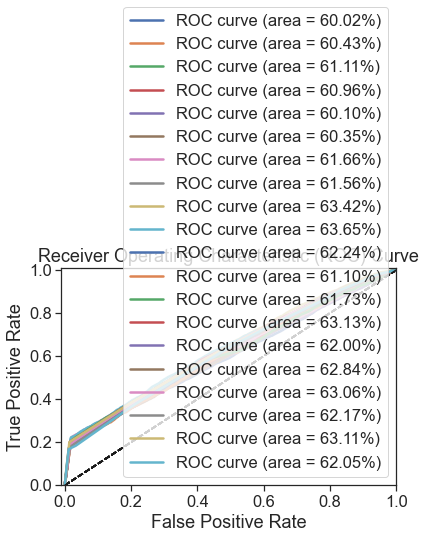

In [79]:
X_train_cv, y_train_cv,X_test, y_test , y_proba, df_total, y_pred, features_selected, param, model, features_importance_df = cv_12months(df_sample, LR, random_undersampling)   # Taking too long... What about removing all subcategory columns with all values 0?

In [110]:
# Count the distinct values in the 'Feature' column
value_counts = features_importance_df['Feature'].value_counts()
# Get the values based on the condition
filtered_values = value_counts[value_counts > 10].index.tolist()
# Select rows based on the list of values
filtered_df = features_importance_df[features_importance_df['Feature'].isin(filtered_values)]
# Compute the mean
filtered_df = filtered_df.groupby('Feature')['Importance'].mean().reset_index()
# Sort values
filtered_df = filtered_df.sort_values('Importance', ascending=False)

Text(0.5, 1.0, 'Feature Importance')

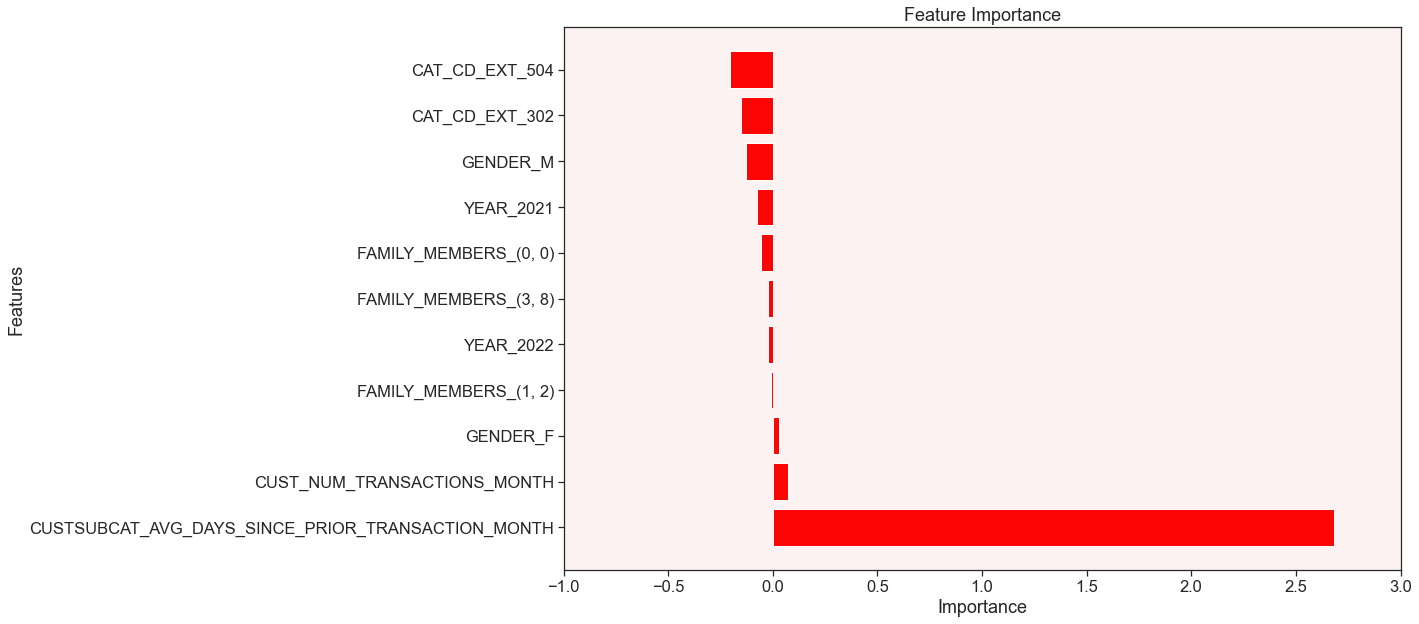

In [135]:
sns.set_style("ticks", {"axes.facecolor": "#fcf2f2"})
fig, ax = plt.subplots(figsize=(15, 10))
positive_df = filtered_df[filtered_df['Importance'] >= 0]
negative_df = filtered_df[filtered_df['Importance'] < 0]
bar1 = ax.barh(positive_df['Feature'],positive_df['Importance'],color='#FD0505')
bar2 = ax.barh(negative_df['Feature'],negative_df['Importance'], color='#FD0505')
ax.set_xlim(-1, 3)
# Set labels and title
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
ax.set_title('Feature Importance')



Start Iteration 2021-01


Treino feito com os meses: 2021-01 até 2021-03
X_train_cv shape:  (132952, 75)
X_train_tune shape:  (39852, 75)
Testado com mês: 2021-04
X_test shape do mês 2021-04:  (139731, 75)
Number of selected features: 1
Features selected: ['YEAR_2022']
Fitting 2 folds for each of 250 candidates, totalling 500 fits


This is Predicted_Labels - else :[1 1 1 ... 1 1 1]


This model has a predict_proba method
Mean Best Accuracy: 100.00%
------------------------------------------------------------
Best Parameters:
{'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 20, 'clf__min_samples_split': 100, 'clf__n_estimators': 500}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  15.98% 
Precision: 15.98% 
Recall:    100.00% 
F1 Score:  27.56% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

      No buy       

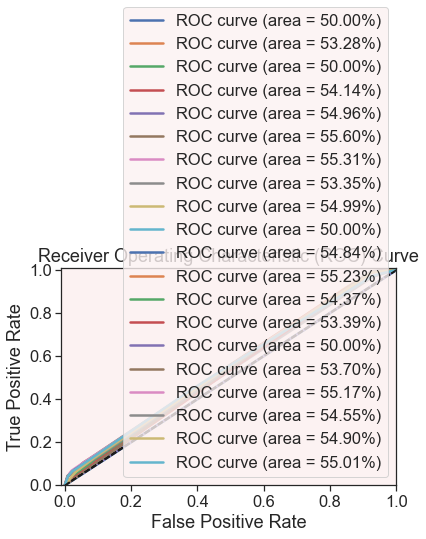

In [140]:
X_train_cv, y_train_cv,X_test, y_test , y_proba, df_total, y_pred, features_selected, param, model, features_importance_df_2 = cv_12months(df_sample, RF, random_undersampling)

## Recommendation System - Top 20 Subcategories for each Customer in the month of November



### Normal recommendation with model ran above

If you didn't run the model, ignore this. Run the sections below with the saved models.

In [ ]:
#aggregate the results of y_proba in tuples of 2
y_proba = y_proba.reshape(int(y_proba.shape[0]/2), 2)

In [ ]:
df_total['PROBABILITIES'] = y_proba.tolist()

In [ ]:
def recommend_fixed():
    df_full = df.groupby('fulldate').sample(frac=0.2, random_state=101)
    df_nov = df_full[df_full['fulldate']=='2022-11']
    #reset index of df_200k_oct
    df_nov = df_nov.reset_index(drop=True)
    y_proba_last = y_proba[-y_pred.shape[0]:]
    y_proba_df = pd.DataFrame(y_proba_last, columns=['NO BUY', 'BUY'])
    y_pred_df = pd.DataFrame(y_pred, columns=['Target'])
    joined_prob_pred = y_pred_df.join(y_proba_df)
    df_oct_joined = df_nov.join(joined_prob_pred)
    df_oct_joined = df_oct_joined[['CUSTOMER_ACCOUNT_NR_MASK', 'SUBCAT_CD_EXT', 'SEG_LIFESTYLE_CD',  'NO BUY', 'BUY', 'Target']]
    #select only the rows where Target = 1
    df_oct_joined = df_oct_joined[df_oct_joined['Target'] == 1]
    #group by customer account nr mask and sort by buy
    recs_grouped = df_oct_joined.groupby('CUSTOMER_ACCOUNT_NR_MASK').apply(lambda x: x.sort_values(by='BUY', ascending=False))
    #rename CUSTOMER_ACCOUNT_NR_MASK to CUSTOMER
    recs_grouped = recs_grouped.rename(columns={'CUSTOMER_ACCOUNT_NR_MASK': 'CUSTOMER'})
    top_subcategories = recs_grouped.groupby('CUSTOMER_ACCOUNT_NR_MASK').apply(lambda x: x.nlargest(20, 'BUY'))
    

    return recs_grouped, top_subcategories

In [ ]:
recs_grouped, top_subcategories = recommend_fixed()

In [ ]:
recs_grouped

### Recommendations using .joblib file

Independentemente do mês escolhido, as recomendações vão ser geradas com base nas features da última iteração do modelo

In [21]:
def recommend_joblib(month, joblib_file):

    df_full_job = df.groupby('fulldate').sample(frac=1, random_state=101)
    df_nov_job = df_full_job[df_full_job['fulldate']==month]

    
    test_job = df_sample[df_sample['fulldate'] == month] 
    X_test_job = test_job.drop(['TARGET', 'fulldate'], axis=1)

    X_test_pandas_job = pd.DataFrame(X_test_job, columns=X_test_job.columns)
    model_job = joblib.load(joblib_file)
    X_test_deploy_job = X_test_pandas_job[['CUST_NUM_TRANSACTIONS_MONTH', 'CUST_NUM_TRANSACTIONS_QUARTER',
       'CUST_NUM_TRANSACTIONS_SEMESTER', 'CUST_NUM_TRANSACTIONS_YEAR',
       'CUST_TOTAL_QTY_BOUGHT_MONTH', 'CUST_TOTAL_QTY_BOUGHT_QUARTER',
       'CUST_TOTAL_QTY_BOUGHT_YEAR', 'CUST_NUM_UNIQUE_SUBCAT_SEMESTER',
       'CUST_NUM_UNIQUE_SUBCAT_YEAR',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR',
       'CUST_AVG_BASKET_SIZE_SEMESTER', 'SUBCAT_NUM_TRANSACTIONS_YEAR',
       'SUBCAT_TOTAL_QTY_BOUGHT_QUARTER', 'SUBCAT_NUM_UNIQUE_CUST_MONTH',
       'CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER',
       'CUSTSUBCAT_TOTAL_QTY_BOUGHT_SEMESTER',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR', 'GENDER_F', 'GENDER_M', 'FAMILY_MEMBERS_(0, 0)',
       'FAMILY_MEMBERS_(1, 2)', 'FAMILY_MEMBERS_(3, 8)', 'CAT_CD_EXT_101',
       'CAT_CD_EXT_102', 'CAT_CD_EXT_103', 'CAT_CD_EXT_202', 'CAT_CD_EXT_203',
       'CAT_CD_EXT_302', 'CAT_CD_EXT_303', 'CAT_CD_EXT_304', 'CAT_CD_EXT_502',
       'CAT_CD_EXT_503', 'CAT_CD_EXT_504', 'CAT_CD_EXT_601', 'CAT_CD_EXT_603',
       'CAT_CD_EXT_604', 'CAT_CD_EXT_702', 'CAT_CD_EXT_801', 'CAT_CD_EXT_804',
       'CAT_CD_EXT_902', 'CAT_CD_EXT_1001', 'CAT_CD_EXT_1002',
       'CAT_CD_EXT_1402', 'CAT_CD_EXT_1403', 'CAT_CD_EXT_1701',
       'CAT_CD_EXT_1703', 'YEAR_2021', 'YEAR_2022']]
    y_proba_job = model_job.predict_proba(X_test_deploy_job)
    y_pred_job = model_job.predict(X_test_deploy_job)
    X_test_pandas_job['PROBABILITIES'] = y_proba_job.tolist()
   
    #reset index of df_200k_oct
    df_nov_job = df_nov_job.reset_index(drop=True)
    y_proba_last = y_proba_job[-y_pred_job.shape[0]:]
    y_proba_df = pd.DataFrame(y_proba_last, columns=['NO BUY', 'BUY'])
    y_pred_df = pd.DataFrame(y_pred_job, columns=['Target'])
    joined_prob_pred = y_pred_df.join(y_proba_df)
    df_oct_joined = df_nov_job.join(joined_prob_pred)
    df_oct_joined = df_oct_joined[['CUSTOMER_ACCOUNT_NR_MASK', 'SUBCAT_CD_EXT', 'SEG_LIFESTYLE_CD',  'NO BUY', 'BUY', 'Target']]
    #select only the rows where Target = 1
    df_oct_joined = df_oct_joined[df_oct_joined['Target'] == 1]
    #group by customer account nr mask and sort by buy
    recs_grouped = df_oct_joined.groupby('CUSTOMER_ACCOUNT_NR_MASK').apply(lambda x: x.sort_values(by='BUY', ascending=False))
    #rename CUSTOMER_ACCOUNT_NR_MASK to CUSTOMER
    recs_grouped_job = recs_grouped.rename(columns={'CUSTOMER_ACCOUNT_NR_MASK': 'CUSTOMER'})
    top20_subcategories_job = recs_grouped_job.groupby('CUSTOMER_ACCOUNT_NR_MASK').apply(lambda x: x.nlargest(20, 'BUY'))
    

    return df_oct_joined, y_pred_job, recs_grouped_job, top20_subcategories_job





In [22]:
df_oct_joined, y_pred_job, recs_grouped_job, top20_subcategories_job = recommend_joblib('2022-11', 'RF.joblib')

### Calculation of frequencies for subcategories (recommendations and total dataset)

In [23]:
##########é para copiar la p baixo

df_sample2 = df.groupby('fulldate').sample(frac=1, random_state=101)

#drop customer id column because we want to generalize the model, instead of trying to predict for each customer
df_sample2 = df_sample2.drop(columns=['CUSTOMER_ACCOUNT_NR_MASK','REG_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH'])

#df_500k.value_counts('fulldate').sort_index()

# Function to replace outliers with average value of the column
def replace_outliers_with_average(df_non_minmax, column):
    # Calculate the lower and upper bounds for outliers using the boxplot rule
    q1 = df_non_minmax[column].quantile(0.25)
    q3 = df_non_minmax[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Replace outliers with the average value of the column
    avg_value = df_non_minmax[column].mean()
    df_non_minmax[column] = df_non_minmax[column].apply(lambda x: avg_value if x < lower_bound or x > upper_bound else x)
    
    return df_non_minmax

# Detect outliers and replace them with average for each column in 'columns_to_check'
numerical_columns = ['CUST_NUM_TRANSACTIONS_MONTH', 'CUST_NUM_TRANSACTIONS_QUARTER',
       'CUST_NUM_TRANSACTIONS_SEMESTER', 'CUST_NUM_TRANSACTIONS_YEAR',
       'CUST_TOTAL_QTY_BOUGHT_MONTH', 'CUST_TOTAL_QTY_BOUGHT_QUARTER',
       'CUST_TOTAL_QTY_BOUGHT_SEMESTER', 'CUST_TOTAL_QTY_BOUGHT_YEAR',
       'CUST_NUM_UNIQUE_SUBCAT_MONTH', 'CUST_NUM_UNIQUE_SUBCAT_QUARTER',
       'CUST_NUM_UNIQUE_SUBCAT_SEMESTER', 'CUST_NUM_UNIQUE_SUBCAT_YEAR',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER',
       'CUST_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR',
       'CUST_AVG_BASKET_SIZE_MONTH', 'CUST_AVG_BASKET_SIZE_QUARTER',
       'CUST_AVG_BASKET_SIZE_SEMESTER', 'CUST_AVG_BASKET_SIZE_YEAR',
       'SUBCAT_NUM_TRANSACTIONS_MONTH', 'SUBCAT_NUM_TRANSACTIONS_QUARTER',
       'SUBCAT_NUM_TRANSACTIONS_SEMESTER', 'SUBCAT_NUM_TRANSACTIONS_YEAR',
       'SUBCAT_TOTAL_QTY_BOUGHT_MONTH', 'SUBCAT_TOTAL_QTY_BOUGHT_QUARTER',
       'SUBCAT_TOTAL_QTY_BOUGHT_SEMESTER', 'SUBCAT_TOTAL_QTY_BOUGHT_YEAR',
       'SUBCAT_NUM_UNIQUE_CUST_MONTH', 'SUBCAT_NUM_UNIQUE_CUST_QUARTER',
       'SUBCAT_NUM_UNIQUE_CUST_SEMESTER', 'SUBCAT_NUM_UNIQUE_CUST_YEAR',
       'CUSTSUBCAT_NUM_TRANSACTIONS_MONTH',
       'CUSTSUBCAT_NUM_TRANSACTIONS_QUARTER',
       'CUSTSUBCAT_NUM_TRANSACTIONS_SEMESTER',
       'CUSTSUBCAT_NUM_TRANSACTIONS_YEAR', 'CUSTSUBCAT_TOTAL_QTY_BOUGHT_MONTH',
       'CUSTSUBCAT_TOTAL_QTY_BOUGHT_QUARTER',
       'CUSTSUBCAT_TOTAL_QTY_BOUGHT_SEMESTER',
       'CUSTSUBCAT_TOTAL_QTY_BOUGHT_YEAR',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_MONTH',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_QUARTER',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_SEMESTER',
       'CUSTSUBCAT_AVG_DAYS_SINCE_PRIOR_TRANSACTION_YEAR']

for column in numerical_columns:
    df_sample2 = replace_outliers_with_average(df_sample2, column)
    
df_sample2.shape


scaler = MinMaxScaler()
df_sample2[numerical_columns] = scaler.fit_transform(df_sample2[numerical_columns])

df_sample2 = df_sample2.drop(columns=['QUARTER','SEMESTER','MONTH'])

# One-hot encoding categorical variables
df_sample2 = pd.get_dummies(df_sample2, columns=['GENDER','FAMILY_MEMBERS','YEAR'])


In [24]:
#select only rows where TARGET is equal to 1
df_only_1s = df_sample2[df_sample2['TARGET'] == 1]
#show most frequent SUBCAT_CD_EXT for each SEG_LIFESTYLE_CD
lifestyles_w_subcat = pd.DataFrame(df_only_1s.groupby('SEG_LIFESTYLE_CD')['SUBCAT_CD_EXT'].value_counts())

#instead of using the absolute number, use the percentage of each SUBCAT_CD_EXT for each SEG_LIFESTYLE_CD
lifestyles_w_subcat['PERC_TOTAL'] = lifestyles_w_subcat.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

#rename the column SUBCAT_CD_EXT to FREQ_TOTAL
lifestyles_w_subcat.rename(columns={'SUBCAT_CD_EXT': 'FREQ_TOTAL'}, inplace=True)

#make a copy of lifestyles_w_subcat
lifestyles_w_subcat_copy = lifestyles_w_subcat.copy()

#reset the index
lifestyles_w_subcat.reset_index(inplace=True)



In [25]:
freq_customer = recs_grouped_job['CUSTOMER'].value_counts().idxmax()

recs_for_freqc = recs_grouped_job[recs_grouped_job['CUSTOMER'] == freq_customer]

#show the most frequent subcategories for each unique SEG_LIFESTYLE_CD
freq_subcats = pd.DataFrame(top20_subcategories_job.groupby('SEG_LIFESTYLE_CD')['SUBCAT_CD_EXT'].value_counts())
pd.set_option('display.max_rows', None)
#rename SUBCAT_CD_EXT to FREQUENCY
freq_subcats = freq_subcats.rename(columns={'SUBCAT_CD_EXT': 'FREQUENCY'})
#create new column with percentage of each subcategory
freq_subcats['PERCENTAGE'] = freq_subcats.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

#reset index from teste
teste_reseted = freq_subcats.reset_index()

#join teste_reseted with recs_for_freqc on SEG_LIFESTYLE_CD and SUBCAT_CD_EXT
joined_both = teste_reseted.merge(recs_grouped_job, on=['SEG_LIFESTYLE_CD', 'SUBCAT_CD_EXT'])

#rename frequency to freq_recs and percentage to perc_recs
joined_both = joined_both.rename(columns={'FREQUENCY': 'FREQ_RECS', 'PERCENTAGE': 'PERC_RECS'})

#join joined_both with lifestyles_w_subcat on SEG_LIFESTYLE_CD and SUBCAT_CD_EXT
joined_wo_dsc = joined_both.merge(lifestyles_w_subcat, on=['SEG_LIFESTYLE_CD', 'SUBCAT_CD_EXT'])

ordenar_colunas = ['CUSTOMER', 'SEG_LIFESTYLE_CD', 'SUBCAT_CD_EXT', 'FREQ_RECS', 'FREQ_TOTAL', 'PERC_RECS', 'PERC_TOTAL'] 

joined_wo_dsc = joined_wo_dsc[ordenar_colunas]

#order by perc_total
joined_wo_dsc = joined_wo_dsc.sort_values(by=['PERC_TOTAL'], ascending=False)

joined_wo_dsc.head(3)


,CUSTOMER,SEG_LIFESTYLE_CD,SUBCAT_CD_EXT,FREQ_RECS,FREQ_TOTAL,PERC_RECS,PERC_TOTAL
44977,58149188,4,10102,2,32,5.00,3.41
44978,58156989,4,10102,2,32,5.00,3.41
44984,58156989,4,100204,2,31,5.00,3.30


In [26]:
recs_for_freqc.head()

CUSTOMER  SUBCAT_CD_EXT  SEG_LIFESTYLE_CD  \
CUSTOMER_ACCOUNT_NR_MASK                                                     
19342312                 55984   19342312          10101                 2   
                         122630  19342312         100204                 2   
                         22929   19342312          20201                 2   
                         25228   19342312          20301                 2   
                         54367   19342312          60401                 2   

                                 NO BUY  BUY  Target  
CUSTOMER_ACCOUNT_NR_MASK                              
19342312                 55984     0.07 0.93       1  
                         122630    0.07 0.93       1  
                         22929     0.07 0.93       1  
                         25228     0.07 0.93       1  
                         54367     0.07 0.93       1

### Compare entire dataframe with recommendations by Lifestage Segment

In [27]:
def lifestage_comparison():
    #from def_oct_joined group by seg_lifestyle_cd and sort by buy
    df_nov_joined = df_oct_joined.groupby('SEG_LIFESTYLE_CD').apply(lambda x: x.sort_values(by='BUY', ascending=False))

    #rename SEG_LIFESTYLE_CD to LYFESTYLE_SEGMENT
    df_nov_joined = df_nov_joined.rename(columns={'SEG_LIFESTYLE_CD': 'LYFESTYLE_SEGMENT'})

    #select 20 rows from every group
    topmais = df_nov_joined.groupby('SEG_LIFESTYLE_CD').apply(lambda x: x.nlargest(20, 'BUY'))
    #show the most frequent subcategories for each unique SEG_LIFESTYLE_CD
    freq_subcats2 = pd.DataFrame(top20_subcategories_job.groupby('SEG_LIFESTYLE_CD')['SUBCAT_CD_EXT'].value_counts())
    pd.set_option('display.max_rows', None)
    #rename SUBCAT_CD_EXT to FREQUENCY
    freq_subcats2 = freq_subcats2.rename(columns={'SUBCAT_CD_EXT': 'FREQUENCY'})
    #create new column with percentage of each subcategory
    freq_subcats2['PERCENTAGE'] = freq_subcats2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

    topmais_drop = topmais.reset_index(level=1, drop=True)

    #show the most frequent subcategories for each unique SEG_LIFESTYLE_CD
    freq_subcats2 = pd.DataFrame(top20_subcategories_job.groupby('SEG_LIFESTYLE_CD')['SUBCAT_CD_EXT'].value_counts())
    pd.set_option('display.max_rows', None)
    #rename SUBCAT_CD_EXT to FREQUENCY
    freq_subcats2 = freq_subcats2.rename(columns={'SUBCAT_CD_EXT': 'FREQUENCY'})
    #create new column with percentage of each subcategory
    freq_subcats2['PERCENTAGE'] = freq_subcats2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

    #reset index from teste
    teste_reseted2 = freq_subcats2.reset_index()

    #join teste_reseted with recs_for_freqc on SEG_LIFESTYLE_CD and SUBCAT_CD_EXT
    joined_both2 = teste_reseted2.merge(topmais_drop, on=['SEG_LIFESTYLE_CD', 'SUBCAT_CD_EXT'])

    #rename frequency to freq_recs and percentage to perc_recs
    joined_both2 = joined_both2.rename(columns={'FREQUENCY': 'FREQ_RECS', 'PERCENTAGE': 'PERC_RECS'})

    #join joined_both with lifestyles_w_subcat on SEG_LIFESTYLE_CD and SUBCAT_CD_EXT
    joined_wo_dsc2 = joined_both2.merge(lifestyles_w_subcat, on=['SEG_LIFESTYLE_CD', 'SUBCAT_CD_EXT'])

    ordenar_colunas = ['SEG_LIFESTYLE_CD', 'SUBCAT_CD_EXT', 'FREQ_RECS', 'FREQ_TOTAL', 'PERC_RECS', 'PERC_TOTAL'] 

    joined_wo_dsc2 = joined_wo_dsc2[ordenar_colunas]

    #group by seg_lifestyle_cd
    joined_wo_dsc2 = joined_wo_dsc2.groupby('SEG_LIFESTYLE_CD').apply(lambda x: x.sort_values(by='PERC_TOTAL', ascending=False))

    #rename column name SEG_LIFESTYLE_CD to LIFESTYLE_SEGMENT
    joined_wo_dsc2 = joined_wo_dsc2.rename(columns={'SEG_LIFESTYLE_CD': 'LIFESTYLE_SEGMENT'})

    #order by perc_total
    joined_wo_dsc2 = joined_wo_dsc2.sort_values(by=['PERC_TOTAL'], ascending=False)

    #order index SEG_LIFESTYLE_CD descending
    joined_wo_dsc2 = joined_wo_dsc2.sort_index(ascending=True)

    #drop duplicates from joined_wo_dsc2
    joined_wo_dsc2 = joined_wo_dsc2.drop_duplicates(subset=['LIFESTYLE_SEGMENT', 'SUBCAT_CD_EXT'], keep='first')

    #drop column LIFESTYLE_SEGMENT
    joined_wo_dsc2 = joined_wo_dsc2.drop(columns=['LIFESTYLE_SEGMENT'])

    return joined_wo_dsc2



In [28]:
ls_comparison = lifestage_comparison()

In [29]:
ls_comparison.groupby('SEG_LIFESTYLE_CD').head(3)

SUBCAT_CD_EXT  FREQ_RECS  FREQ_TOTAL  PERC_RECS  \
SEG_LIFESTYLE_CD                                                       
1                0           30401        288        5193       3.28   
                 6          100201        261        4063       2.97   
                 7          140304        242        4217       2.76   
2                20          30401        213        3917       3.50   
                 25          10101        212        3790       3.49   
                 27          20302        211        3286       3.47   
3                40          10101        149        2531       4.06   
                 42          20302        122        2072       3.32   
                 45          80103        115        1964       3.13   
4                60          10102          2          32       5.00   
                 61          10303          2          22       5.00   
                 62         100204          2          31       5.00   

                     PERC_TOTAL  
SEG_LIFESTYLE_CD                 
1                0         2.37  
                 6         1.85  
                 7         1.92  
2                20        2.52  
                 25        2.44  
                 27        2.11  
3                40        2.71  
                 42        2.22  
                 45        2.11  
4                60        3.41  
                 61        2.34  
                 62        3.30

## Deployment

December 2022 does not have the TARGET value. Using the best model/setup used for training, the TARGET value is predicted


In [30]:
X_test_deploy = df_sample[df_sample['fulldate'] == '2022-12']
X_test_deploy = X_test_deploy.drop(columns=['TARGET', 'fulldate'])
#from df_sample print number of rows with fulldate = '2022-12' 


In [32]:
df_oct_joined, y_pred_job, recs_grouped_job, top20_subcategories_job_deploy = recommend_joblib('2022-12', 'RF.joblib')

In [33]:
y_pred_job.shape[0] == X_test_deploy.shape[0]

True

In [34]:
def compare_customer():
    freq_customer = recs_grouped_job['CUSTOMER'].value_counts().idxmax()

    recs_for_freqc = recs_grouped_job[recs_grouped_job['CUSTOMER'] == freq_customer]

    #show the most frequent subcategories for each unique SEG_LIFESTYLE_CD
    freq_subcats = pd.DataFrame(top20_subcategories_job_deploy.groupby('SEG_LIFESTYLE_CD')['SUBCAT_CD_EXT'].value_counts())
    pd.set_option('display.max_rows', None)
    #rename SUBCAT_CD_EXT to FREQUENCY
    freq_subcats = freq_subcats.rename(columns={'SUBCAT_CD_EXT': 'FREQUENCY'})
    #create new column with percentage of each subcategory
    freq_subcats['PERCENTAGE'] = freq_subcats.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

    #reset index from teste
    teste_reseted = freq_subcats.reset_index()

    #join teste_reseted with recs_for_freqc on SEG_LIFESTYLE_CD and SUBCAT_CD_EXT
    joined_both = teste_reseted.merge(recs_for_freqc, on=['SEG_LIFESTYLE_CD', 'SUBCAT_CD_EXT'])

    #rename frequency to freq_recs and percentage to perc_recs
    joined_both = joined_both.rename(columns={'FREQUENCY': 'FREQ_RECS', 'PERCENTAGE': 'PERC_RECS'})

    #join joined_both with lifestyles_w_subcat on SEG_LIFESTYLE_CD and SUBCAT_CD_EXT
    joined_wo_dsc = joined_both.merge(lifestyles_w_subcat, on=['SEG_LIFESTYLE_CD', 'SUBCAT_CD_EXT'])

    ordenar_colunas = ['CUSTOMER', 'SEG_LIFESTYLE_CD', 'SUBCAT_CD_EXT', 'FREQ_RECS', 'FREQ_TOTAL', 'PERC_RECS', 'PERC_TOTAL'] 

    customer = joined_wo_dsc[ordenar_colunas]

    

    #in the customer df, creates a column with the difference between perc_total and perc_recs
    customer['DIFFERENCE_PERC'] = customer['PERC_RECS'] - customer['PERC_TOTAL']

    #order customer by perc_total
    customer = customer.sort_values(by=['DIFFERENCE_PERC'], ascending=False)

    return customer


In [35]:
customer = compare_customer()

In [36]:
customer.head(20)

,CUSTOMER,SEG_LIFESTYLE_CD,SUBCAT_CD_EXT,FREQ_RECS,FREQ_TOTAL,PERC_RECS,PERC_TOTAL,DIFFERENCE_PERC
0,13031606,1,20201,286,4377,3.24,2.00,1.24
6,13031606,1,100201,253,4063,2.86,1.85,1.01
3,13031606,1,10301,266,4432,3.01,2.02,0.99
4,13031606,1,10303,265,4442,3.00,2.03,0.97
8,13031606,1,80110,228,3581,2.58,1.63,0.95
9,13031606,1,20302,224,3598,2.54,1.64,0.89
1,13031606,1,10101,282,5133,3.19,2.34,0.85
10,13031606,1,10102,221,3660,2.50,1.67,0.83
2,13031606,1,100204,272,5024,3.08,2.29,0.79
7,13031606,1,60401,243,4338,2.75,1.98,0.77
